In [1]:
from netCDF4 import Dataset
import pandas as pd
from cartoplot import cartoplot
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy
# import numpy.ma as ma
from contourpy import contour_generator
# from scipy.ndimage import label
from ll_xy import lonlat_to_xy
import tqdm
import shapely
import os
import datetime
from utils import get_contours

In [2]:
# sshfs romal7177@rcm3.phys.uit.no:/ /home/robbie/uit_mnt -o nonempty

conc_dir = '/home/robbie/uit_mnt/Data/romal7177/ResearchData/IFT/EarthObservation/SatelliteAltimetry/OSISAF Sea Ice Concentration'

In [23]:
f=f'{conc_dir}/2020/ice_conc_nh_ease2-250_icdr-v2p0_202002051200.nc'
with Dataset(f) as d:
    it_lon = np.array(d['lon'])
    it_lat = np.array(d['lat'])
# Convert to EPSG 3408

xgrid,ygrid = lonlat_to_xy(it_lon,it_lat,hemisphere='n')

d = Dataset(f)

/tmp/ipykernel_17483/3724467162.py:3: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  it_lon = np.array(d['lon'])
/tmp/ipykernel_17483/3724467162.py:4: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  it_lat = np.array(d['lat'])


# A couple of figures to illustrate the region of interest (with different sea ice extents)
### Dates are 5th October and 5th Feb

### Yellow indicates the 0 - 40 degree range of longitude
### Pink indicates the optional addition of the 40 - 50 degree range

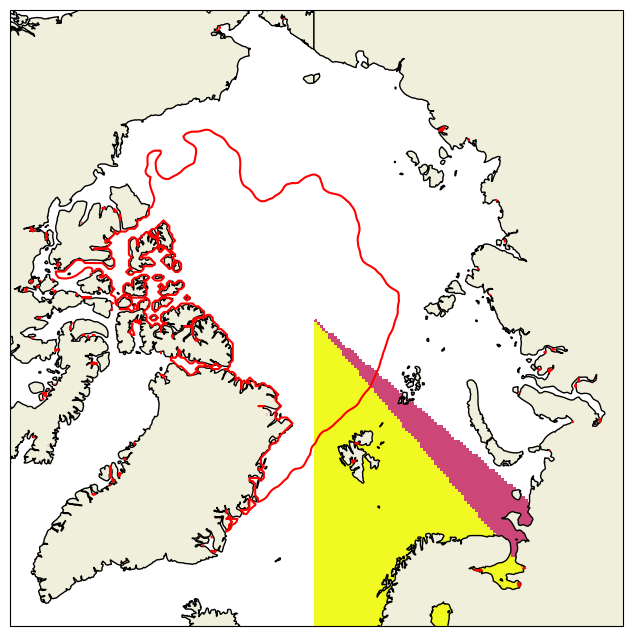

In [22]:
f=f'{conc_dir}/2020/ice_conc_nh_ease2-250_icdr-v2p0_202010051200.nc'
d = Dataset(f)

dat = np.array(d['ice_conc'][0])/100


fig = plt.figure(figsize=(8,8))

proj = ccrs.NorthPolarStereo()
maxlat=90
    
ax = plt.axes(projection=proj)
ax.add_feature(cartopy.feature.LAND, edgecolor='black',zorder=1)

ax.set_extent([-180, 180, maxlat, 66], ccrs.PlateCarree())

data = it_lon.copy()
data[:,:]=np.nan
data[(it_lon>0)&(it_lon<40)]=1
data[(it_lon>40)&(it_lon<50)]=0.5

ax.contour(xgrid,ygrid,dat,
           transform=ccrs.epsg(3408),
           levels=[0.5],colors=['r'])

m = ax.pcolormesh(it_lon,
                  it_lat,
                  data,
                  vmin = 0,
                  vmax = 1,
                 transform=ccrs.PlateCarree(),
                  zorder=0,
                  cmap='plasma')

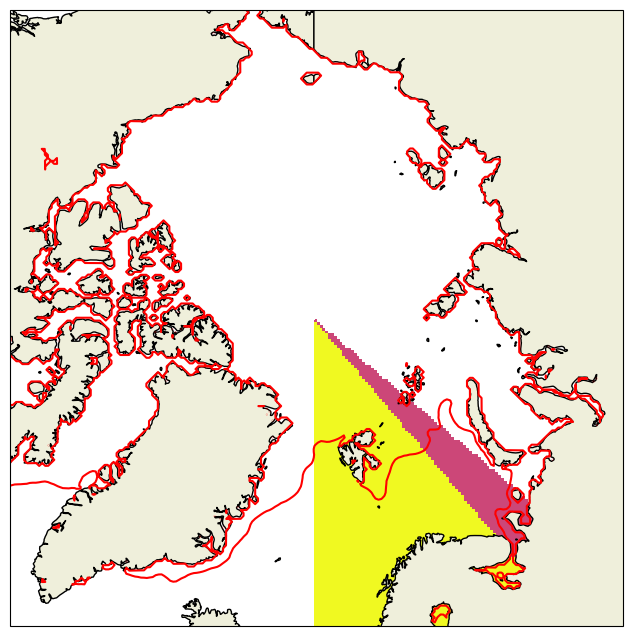

In [5]:
years_available = [int(x) for x in sorted(os.listdir(conc_dir))]

filenames = []
dts = []
years = []

for yr in years_available:
    fnames = sorted(os.listdir(f'{conc_dir}/{yr}'))
    filenames += fnames
    dts += [datetime.date(int(dtstr[-15:-11]),int(dtstr[-11:-9]),int(dtstr[-9:-7])) for dtstr in fnames] 
    years += [yr]*len(fnames)
    
df = pd.DataFrame({'filename':filenames,'date':dts,'year':years})
df['month'] = [x.month for x in df['date']]
df['day'] = [x.day for x in df['date']]
df

,filename,date,year,month,day
0,ice_conc_nh_ease2-250_cdr-v2p0_197901021200.nc,1979-01-02,1979,1,2
1,ice_conc_nh_ease2-250_cdr-v2p0_197901041200.nc,1979-01-04,1979,1,4
2,ice_conc_nh_ease2-250_cdr-v2p0_197901061200.nc,1979-01-06,1979,1,6
3,ice_conc_nh_ease2-250_cdr-v2p0_197901081200.nc,1979-01-08,1979,1,8
4,ice_conc_nh_ease2-250_cdr-v2p0_197901101200.nc,1979-01-10,1979,1,10
...,...,...,...,...,...
15139,ice_conc_nh_ease2-250_icdr-v3p0_202502201200.nc,2025-02-20,2025,2,20
15140,ice_conc_nh_ease2-250_icdr-v3p0_202502211200.nc,2025-02-21,2025,2,21
15141,ice_conc_nh_ease2-250_icdr-v3p0_202502221200.nc,2025-02-22,2025,2,22
15142,ice_conc_nh_ease2-250_icdr-v3p0_202502231200.nc,2025-02-23,2025,2,23


In [6]:
# Get Sep 1 Files

df_s1 = df[(df['month']==9)&(df['day']==1)]
df_s1 = df_s1[(df_s1['year']>1999)&(df_s1['year']<2006)]
df_s1

,filename,date,year,month,day
6202,ice_conc_nh_ease2-250_cdr-v2p0_200009011200.nc,2000-09-01,2000,9,1
6566,ice_conc_nh_ease2-250_cdr-v2p0_200109011200.nc,2001-09-01,2001,9,1
6931,ice_conc_nh_ease2-250_cdr-v2p0_200209011200.nc,2002-09-01,2002,9,1
7296,ice_conc_nh_ease2-250_cdr-v2p0_200309011200.nc,2003-09-01,2003,9,1
7662,ice_conc_nh_ease2-250_cdr-v2p0_200409011200.nc,2004-09-01,2004,9,1
8027,ice_conc_nh_ease2-250_cdr-v2p0_200509011200.nc,2005-09-01,2005,9,1


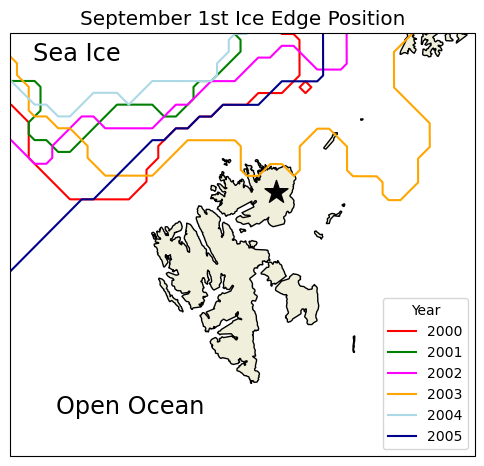

In [8]:
fig = plt.figure(figsize=(6,6))
proj = ccrs.NorthPolarStereo()
ax = plt.axes(projection=proj)

ax.set_extent([-0.09e+06, 0.9e6, -1.6e6, -0.7e6], crs=ccrs.NorthPolarStereo()) 

ax.add_feature(cartopy.feature.LAND, edgecolor='black',zorder=1)

month = '09'

for year, color, f in zip(np.arange(2000,2016),['r','g','magenta','orange','lightblue','darkblue',],df_s1['filename']):

    with Dataset(f'{conc_dir}/{year}/{f}') as d:
        
        
        thresh = 70
        it = np.array(d['ice_conc'][0]).astype(np.float32)
        it[it<=thresh] = 0
        it[it>thresh] = 1
        
        cont = ax.contour(xgrid,
                          ygrid,
                          it,
                          levels=[0.5],
                          transform=cartopy.crs.epsg('3408'),
                          colors=[color])

        ax.plot([],[],color=color,label=year)

ax.set_title('September 1st Ice Edge Position',fontsize='x-large')
ax.annotate('Sea Ice',xy=(0.05,0.98),va='top',xycoords='axes fraction',fontsize='xx-large')
ax.annotate('Open Ocean',xy=(0.1,0.1),xycoords='axes fraction',fontsize='xx-large')
ax.scatter(24.6,79.8,transform=ccrs.PlateCarree(),marker='*',s=302,c='k')
ax.legend(title='Year',loc='lower right')
fig.savefig('figures/Ice_Edge_Sep25.png',dpi=400,bbox_inches='tight')

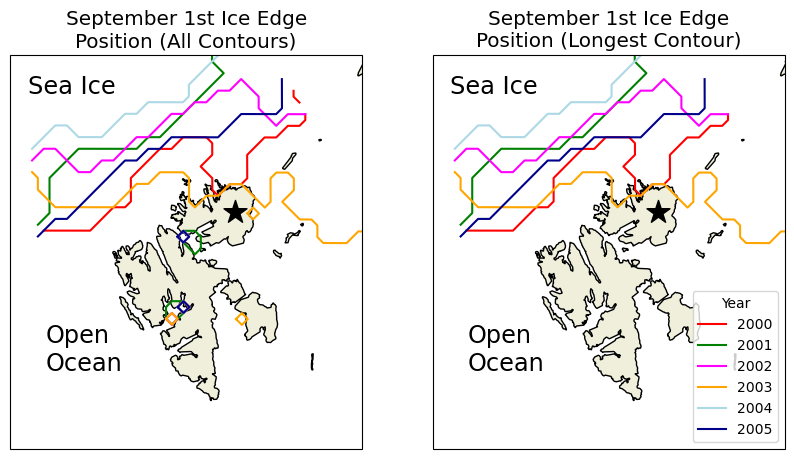

In [10]:

fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,6),subplot_kw={'projection':proj})

for ax in [ax1,ax2]:
    ax.set_extent([-0.01e+06, 0.75e6, -1.55e6, -0.7e6], crs=ccrs.NorthPolarStereo()) 
    ax.add_feature(cartopy.feature.LAND, edgecolor='black',zorder=1)

month = '09'

for year, color,f in zip(np.arange(2000,2016),['r','g','magenta','orange','lightblue','darkblue',],df_s1['filename']):

    with Dataset(f'{conc_dir}/{year}/{f}') as d:
        
        lines,line_lengths,open_ = get_contours(d,it_lon,it_lat,xgrid,ygrid)
        
           
        for longest_line in lines:
            x = longest_line[:,0]
            y = longest_line[:,1]
            lonline,latline=lonlat_to_xy(x,y,hemisphere='n',inverse=True)
            xclean = x[((lonline>2) & (lonline<38))&(latline<88)]
            yclean = y[((lonline>2) & (lonline<38))&(latline<88)]
            ax1.plot(xclean,yclean,transform=cartopy.crs.epsg('3408'),color=color)

        longest_line = lines[np.argmax(line_lengths)]     
        x = longest_line[:,0]
        y = longest_line[:,1]
        lonline,latline=lonlat_to_xy(x,y,hemisphere='n',inverse=True)
        xclean = x[((lonline>2) & (lonline<38))&(latline<88)]
        yclean = y[((lonline>2) & (lonline<38))&(latline<88)]
        ax2.plot(xclean,yclean,transform=cartopy.crs.epsg('3408'),color=color)
        

        ax2.plot([],[],color=color,label=year)

ax1.set_title('September 1st Ice Edge\nPosition (All Contours)',fontsize='x-large')
ax2.set_title('September 1st Ice Edge\nPosition (Longest Contour)',fontsize='x-large')

        
for ax in [ax1,ax2]:
    ax.annotate('Sea Ice',xy=(0.05,0.95),va='top',xycoords='axes fraction',fontsize='xx-large')
    ax.annotate('Open\nOcean',xy=(0.1,0.2),xycoords='axes fraction',fontsize='xx-large')
    ax.scatter(24.6,79.8,transform=ccrs.PlateCarree(),marker='*',s=302,c='k')

ax2.legend(title='Year',loc='lower right',ncol=1)
fig.savefig('figures/Ice_Edge_Cleaning.png',dpi=400,bbox_inches='tight')

In [12]:
full_month_names = ['January','February','March','April','May','June','July','August','September','October','November','December']

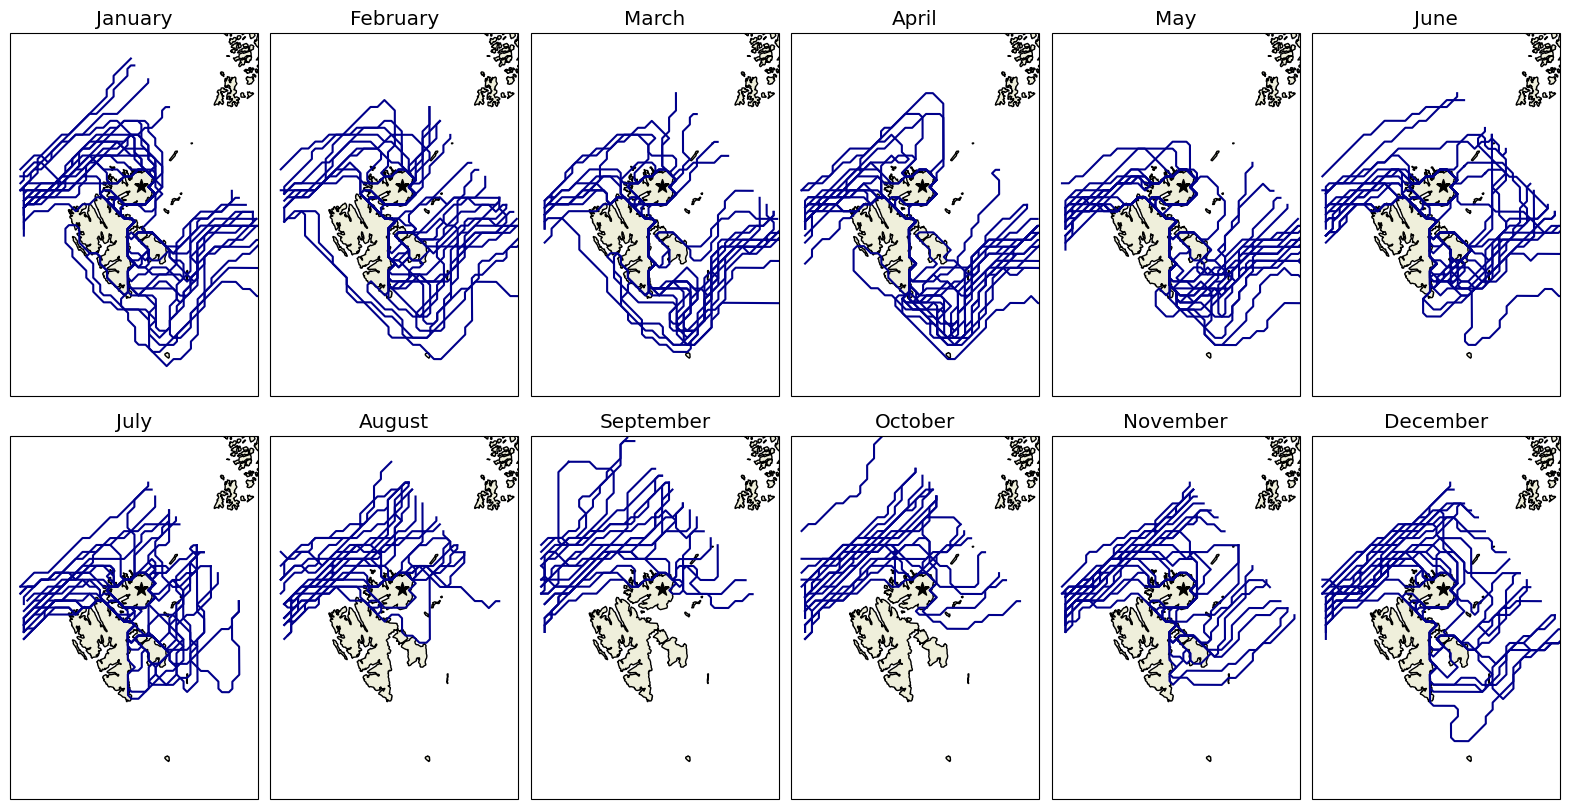

In [14]:
proj = ccrs.NorthPolarStereo()
fig,axs = plt.subplots(2,6,figsize=(20,10),subplot_kw={'projection':proj})

edges = {}

for m, ax in zip(np.arange(1,13),axs.reshape(-1)):

    edges[m] = []

    ax.set_extent([0, 30,85, 74], ccrs.PlateCarree())
    ax.add_feature(cartopy.feature.LAND, edgecolor='black',zorder=1)
    month = str(m).zfill(2)
    ax.set_title(full_month_names[m-1],fontsize='x-large')
    
    df_s1 = df[(df['month']==m)&(df['day']==1)]
    

    for year in np.arange(2002,2021):
        
        df_s1y = df_s1[df_s1['year']==year]
        f = df_s1y.iloc[0]['filename']
    
        with Dataset(f'{conc_dir}/{year}/{f}') as d:
            
            lines,line_lengths,open_ = get_contours(d,it_lon,it_lat,xgrid,ygrid)
    
            longest_line = lines[np.argmax(line_lengths)]
    
            x = longest_line[:,0]
            y = longest_line[:,1]
            lonline,latline=lonlat_to_xy(x,y,hemisphere='n',inverse=True)
    
            xclean = x[((lonline>2) & (lonline<38))&(latline<88)]
            yclean = y[((lonline>2) & (lonline<38))&(latline<88)]
            ax.plot(xclean,yclean,transform=cartopy.crs.epsg('3408'),color=color,label=year)

            edges[m].append((xclean,yclean))

    
    ax.scatter(24.6,79.8,transform=ccrs.PlateCarree(),marker='*',s=100,c='k')

    fig.subplots_adjust(wspace=0.05,hspace=0.1)
    
fig.savefig('Edges_by_month_Sep25.png',dpi=400,bbox_inches='tight')

# Calculate centre of mass of line

Text(0, 0.5, 'Y Distance (m)')

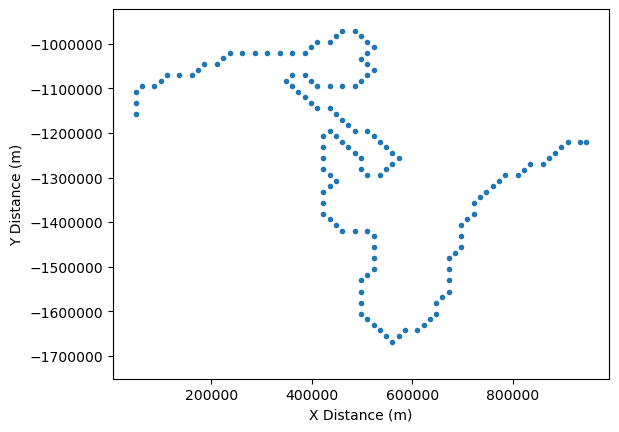

In [24]:
x,y=edges[1][0][0],edges[1][0][1]


plt.scatter(x,y,marker='.')
plt.ticklabel_format(style='plain')

plt.ylim(np.nanmin(y)*1.05,np.nanmax(y)*0.95)

plt.xlabel('X Distance (m)')
plt.ylabel('Y Distance (m)')

Text(0, 0.5, 'Y Distance (m)')

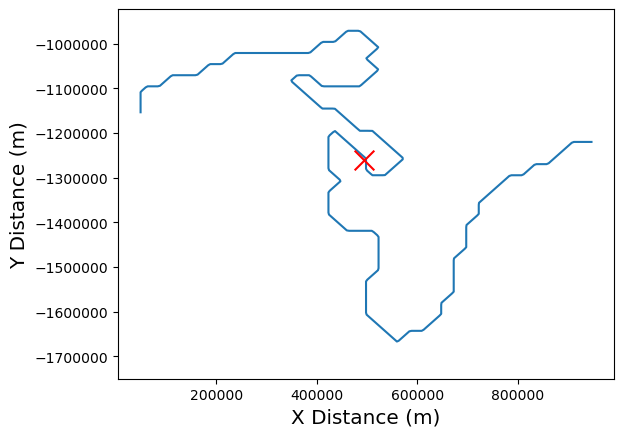

In [25]:
x,y=edges[1][0][0],edges[1][0][1]

line = shapely.LineString(np.array([x,y]).T)

distance_delta=5000
distances = np.arange(0,line.length,distance_delta)

points = [line.interpolate(distance) for distance in distances]
new_line = shapely.LineString(points)

x_ = np.array(new_line.coords)[:,0]
y_ = np.array(new_line.coords)[:,1]

xbar = np.nanmean(x_)
ybar = np.nanmean(y_)

plt.scatter(xbar,ybar,marker='x',c='r',s=200,zorder=5)

plt.plot(x_,y_)
plt.ticklabel_format(style='plain')

plt.ylim(np.nanmin(y_)*1.05,np.nanmax(y_)*0.95)

plt.xlabel('X Distance (m)',fontsize='x-large')
plt.ylabel('Y Distance (m)',fontsize='x-large')

In [26]:
coms = {}

for month in tqdm.trange(1,13):
    
    coms[month] = []
    
    q = edges[month]

    for year_ind in range(len(q)):

        x,y = q[year_ind][0],q[year_ind][1]
        
        xbar,ybar = calc_line_COM(x,y)
        
        lonbar,latbar = lonlat_to_xy(np.array(xbar),np.array(ybar),inverse=True,hemisphere='n')
        
        coms[month].append((lonbar,latbar))

100%|███████████████████████████████████████████| 12/12 [00:05<00:00,  2.20it/s]


In [58]:
years = np.arange(2002,2021)

for key in coms.keys():
    
    month_name = full_month_names[key-1]
    
    xseries,yseries = np.array(coms[key])[:,0],np.array(coms[key])[:,1]
    
    df = pd.DataFrame({'lon':xseries,'lat':yseries,'year':years})

    df.to_hdf('edge_COM_v2.h5',key=month_name,mode='a')

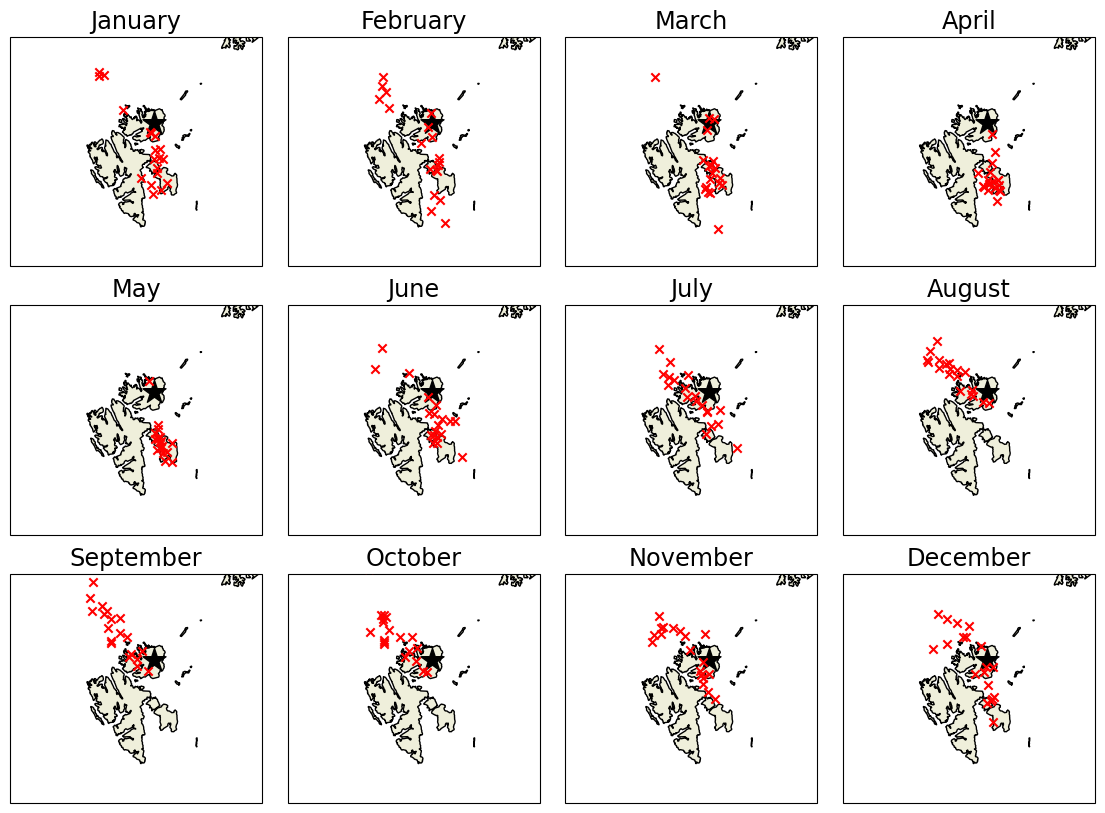

In [59]:
proj = ccrs.NorthPolarStereo()
fig,axs = plt.subplots(3,4,figsize=(14,10),subplot_kw={'projection':proj})

for monthnum,ax in zip(np.arange(1,13),axs.reshape(-1)):
    
    df = pd.read_hdf('edge_COM.h5',mode='r',key=full_month_names[monthnum-1])

    ax.scatter(df['lon'],df['lat'],transform=ccrs.PlateCarree(),zorder=5,marker='x',color='r')

    ax.set_extent([-180, 180,90, 65], ccrs.PlateCarree())

    ax.set_extent([-0.09e+06, 0.9e6, -1.6e6, -0.7e6], crs=ccrs.NorthPolarStereo()) 

    ax.add_feature(cartopy.feature.LAND, edgecolor='black',zorder=1)

    ax.set_title(f'{full_month_names[monthnum-1]}',fontsize='xx-large')
    ax.scatter(24.6,79.8,transform=ccrs.PlateCarree(),marker='*',s=302,c='k')

plt.subplots_adjust(wspace=0.1,hspace=0.15)
    
fig.savefig('EDGE_COMS_Jan25.png',dpi=400,bbox_inches='tight')